<a href="https://colab.research.google.com/github/sarisppp/PJ63_CE18/blob/master/ML_model_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ทำการ import Envoloment แล้ว โหลดข้อมูล**

In [ ]:

import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

from sklearn.preprocessing import MinMaxScaler


Mounted at /content/drive


In [ ]:
used_features = ['Timestamp','SET50.Close','EMAV(5)','Vol','EMAV(Vol,5)','MACD(13,5,5)','EMAV(MACD,5)','RSI(14)']
data = pd.read_excel("/content/drive/My Drive/Set50_20190314_20200820_1minute (1).xlsx",usecols =used_features)
data.info()
data.set_index("Timestamp",inplace=True)
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55920 entries, 0 to 55919
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     55920 non-null  object 
 1   SET50.Close   55920 non-null  float64
 2   EMAV(5)       55916 non-null  float64
 3   Vol           55920 non-null  int64  
 4   RSI(14)       55907 non-null  float64
 5   MACD(13,5,5)  55908 non-null  float64
 6   EMAV(Vol,5)   55916 non-null  float64
 7   EMAV(MACD,5)  55904 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.4+ MB


,SET50.Close,EMAV(5),Vol,RSI(14),"MACD(13,5,5)","EMAV(Vol,5)","EMAV(MACD,5)"
Timestamp,,,,,,,
13/03/19 14:26:00,1081.38,NaN,7698,NaN,NaN,NaN,NaN
13/03/19 14:27:00,1079.86,NaN,817,NaN,NaN,NaN,NaN
13/03/19 14:28:00,1081.50,NaN,2935,NaN,NaN,NaN,NaN
13/03/19 14:29:00,1081.32,NaN,94,NaN,NaN,NaN,NaN
13/03/19 14:30:00,1081.37,1081.0860,1900,NaN,NaN,2688.8894,NaN
13/03/19 14:31:00,1081.66,1081.2773,703,NaN,NaN,2026.9929,NaN
13/03/19 14:32:00,1081.42,1081.3249,3331,NaN,NaN,2461.7313,NaN
13/03/19 14:33:00,1080.90,1081.1833,6272,NaN,NaN,3731.9482,NaN
13/03/19 14:34:00,1081.01,1081.1255,1922,NaN,NaN,3128.7555,NaN


**** ฟังชั่นเตรียมข้อมูลสำหรับการ train****

In [ ]:
def signal(data,periods=16):
  data['signal']=0
  for index,row in data.iterrows():
        #if index >= periods:
            if row['Vol'] > row['EMAV(Vol,5)'] :
              if row['SET50.Close']>row['EMAV(5)']:                  
                  if row['MACD(13,5,5)']>row['EMAV(MACD,5)'] and row['RSI(14)']<70:
                    signal=1
                  else:
                    signal=0
              if row['SET50.Close']<row['EMAV(5)']:               
                if row['MACD(13,5,5)']<row['EMAV(MACD,5)'] and row['RSI(14)']>30:
                  signal=-1
                else :
                  signal=0
            else:
              signal=0
            data.at[index, 'signal']= signal
    
     
  return data

**นำข้อมูลเข้าฟังชั่น**

In [ ]:
data_new=data
data_new=signal(data_new)
data_new.tail(15)



,SET50.Close,EMAV(5),Vol,RSI(14),"MACD(13,5,5)","EMAV(Vol,5)","EMAV(MACD,5)",signal
Timestamp,,,,,,,,
20/08/20 16:27:00,840.52,840.7521,3040,45.1573,-0.3093,3748.5703,-0.213,0
20/08/20 16:28:00,842.05,841.1847,2610,55.3203,-0.0179,3368.8932,-0.148,0
20/08/20 16:29:00,841.18,841.1831,4836,49.6824,-0.0162,3858.0242,-0.104,0
20/08/20 16:30:00,841.01,841.1254,590,48.6393,-0.0469,2768.7931,-0.085,0
20/08/20 16:34:00,841.01,841.0869,2000,48.6393,-0.0622,2512.5287,-0.077,0
20/08/20 16:36:00,840.28,840.8180,73919,44.0349,-0.2070,26314.6525,-0.121,-1
20/08/20 16:37:00,840.28,840.6386,2036,44.0349,-0.2799,18221.8683,-0.174,0
20/08/20 16:38:00,840.28,840.5191,1332,44.0349,-0.3082,12592.0589,-0.219,0
20/08/20 16:39:00,840.28,840.4394,200,44.0349,-0.3097,8461.5059,-0.249,0


**clean data**

In [ ]:
data_new=data_new.dropna()
data_X = data_new.drop('signal',axis=1)
data_Y = data_new.signal

**Model กับ split ข้อมูล แล้ว Train**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.20, random_state=0)
print(train_X.info())
print("=====================================")
print(train_y.head())

RandomForest = RandomForestClassifier(n_estimators=100)
RandomForest.fit(train_X, train_y)

<class 'pandas.core.frame.DataFrame'>
Index: 44723 entries, 17/12/19 11:07:00 to 13/09/19 14:34:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SET50.Close   44723 non-null  float64
 1   EMAV(5)       44723 non-null  float64
 2   Vol           44723 non-null  int64  
 3   RSI(14)       44723 non-null  float64
 4   MACD(13,5,5)  44723 non-null  float64
 5   EMAV(Vol,5)   44723 non-null  float64
 6   EMAV(MACD,5)  44723 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.7+ MB
None
Timestamp
17/12/19 11:07:00      0
2020-05-08 15:26:00    0
24/10/19 12:10:00      0
23/12/19 15:50:00      0
2020-09-07 11:51:00    0
Name: signal, dtype: int64


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**รายงานผลการ Test**

In [ ]:
y_predict=RandomForest.predict(test_X)

from sklearn.metrics import classification_report 
report = classification_report(test_y,y_predict)
print(report)

              precision    recall  f1-score   support

          -1       0.85      0.78      0.81      1529
           0       0.93      0.95      0.94      8151
           1       0.85      0.78      0.81      1501

    accuracy                           0.91     11181
   macro avg       0.87      0.84      0.86     11181
weighted avg       0.91      0.91      0.91     11181



**โหลดข้อมูลใหม่เพื่อ นำมา predict**

In [ ]:
used_features = ['Timestamp','SET50.Close','EMAV(5)','Vol','EMAV(Vol,5)','MACD(13,5,5)','EMAV(MACD,5)','RSI(14)']
data = pd.read_excel("/content/drive/My Drive/Set50_20190314_20200820_1minute (1).xlsx",usecols =used_features)
data.set_index("Timestamp",inplace=True)
data.isnull().sum()
import time
data.head(20)

,SET50.Close,EMAV(5),Vol,RSI(14),"MACD(13,5,5)","EMAV(Vol,5)","EMAV(MACD,5)"
Timestamp,,,,,,,
13/03/19 14:26:00,1081.38,NaN,7698,NaN,NaN,NaN,NaN
13/03/19 14:27:00,1079.86,NaN,817,NaN,NaN,NaN,NaN
13/03/19 14:28:00,1081.50,NaN,2935,NaN,NaN,NaN,NaN
13/03/19 14:29:00,1081.32,NaN,94,NaN,NaN,NaN,NaN
13/03/19 14:30:00,1081.37,1081.0860,1900,NaN,NaN,2688.8894,NaN
13/03/19 14:31:00,1081.66,1081.2773,703,NaN,NaN,2026.9929,NaN
13/03/19 14:32:00,1081.42,1081.3249,3331,NaN,NaN,2461.7313,NaN
13/03/19 14:33:00,1080.90,1081.1833,6272,NaN,NaN,3731.9482,NaN
13/03/19 14:34:00,1081.01,1081.1255,1922,NaN,NaN,3128.7555,NaN


In [ ]:

data=data.dropna()
data_predict=RandomForest.predict(data)
data['signal_predict']=data_predict
data.head()

,SET50.Close,EMAV(5),Vol,RSI(14),"MACD(13,5,5)","EMAV(Vol,5)","EMAV(MACD,5)",signal_predict
Timestamp,,,,,,,,
13/03/19 14:42:00,1081.53,1081.7645,1704,50.7389,0.1998,2618.7323,0.394,0
13/03/19 14:43:00,1081.18,1081.5697,740,48.2279,0.0599,1992.6252,0.283,0
13/03/19 14:44:00,1080.38,1081.1731,2758,42.9908,-0.1752,2247.8328,0.130,-1
13/03/19 14:45:00,1080.90,1081.0821,719,47.0181,-0.2022,1738.1205,0.019,0
13/03/19 14:46:00,1082.00,1081.3881,1434,54.3627,0.0015,1636.7890,0.013,0


**นำ ข้อมูล predict มาเทียบกับ ข้อมูลที่มีผลลัพท์อยู่แล้ว signal กับ signal_pre**

In [ ]:
data=signal(data)
data.head(500)

,SET50.Close,EMAV(5),Vol,RSI(14),"MACD(13,5,5)","EMAV(Vol,5)","EMAV(MACD,5)",signal_predict,signal
Timestamp,,,,,,,,,
13/03/19 14:42:00,1081.53,1081.7645,1704,50.7389,0.1998,2618.7323,0.394,0,0
13/03/19 14:43:00,1081.18,1081.5697,740,48.2279,0.0599,1992.6252,0.283,0,0
13/03/19 14:44:00,1080.38,1081.1731,2758,42.9908,-0.1752,2247.8328,0.130,-1,-1
13/03/19 14:45:00,1080.90,1081.0821,719,47.0181,-0.2022,1738.1205,0.019,0,0
13/03/19 14:46:00,1082.00,1081.3881,1434,54.3627,0.0015,1636.7890,0.013,0,0
...,...,...,...,...,...,...,...,...,...
30/08/19 16:08:00,1095.36,1094.9665,1649,59.0013,0.3365,1854.2366,0.273,0,0
30/08/19 16:09:00,1094.96,1094.9643,28428,55.2249,0.2872,10712.0497,0.278,0,0
30/08/19 16:10:00,1095.54,1095.1562,6219,59.2934,0.3558,9214.3868,0.304,0,0


**plot กราฟ สัญญาณการ ซื้้อขาย แต่ ละ ช่วงเวลา 30 ข้อมูล**

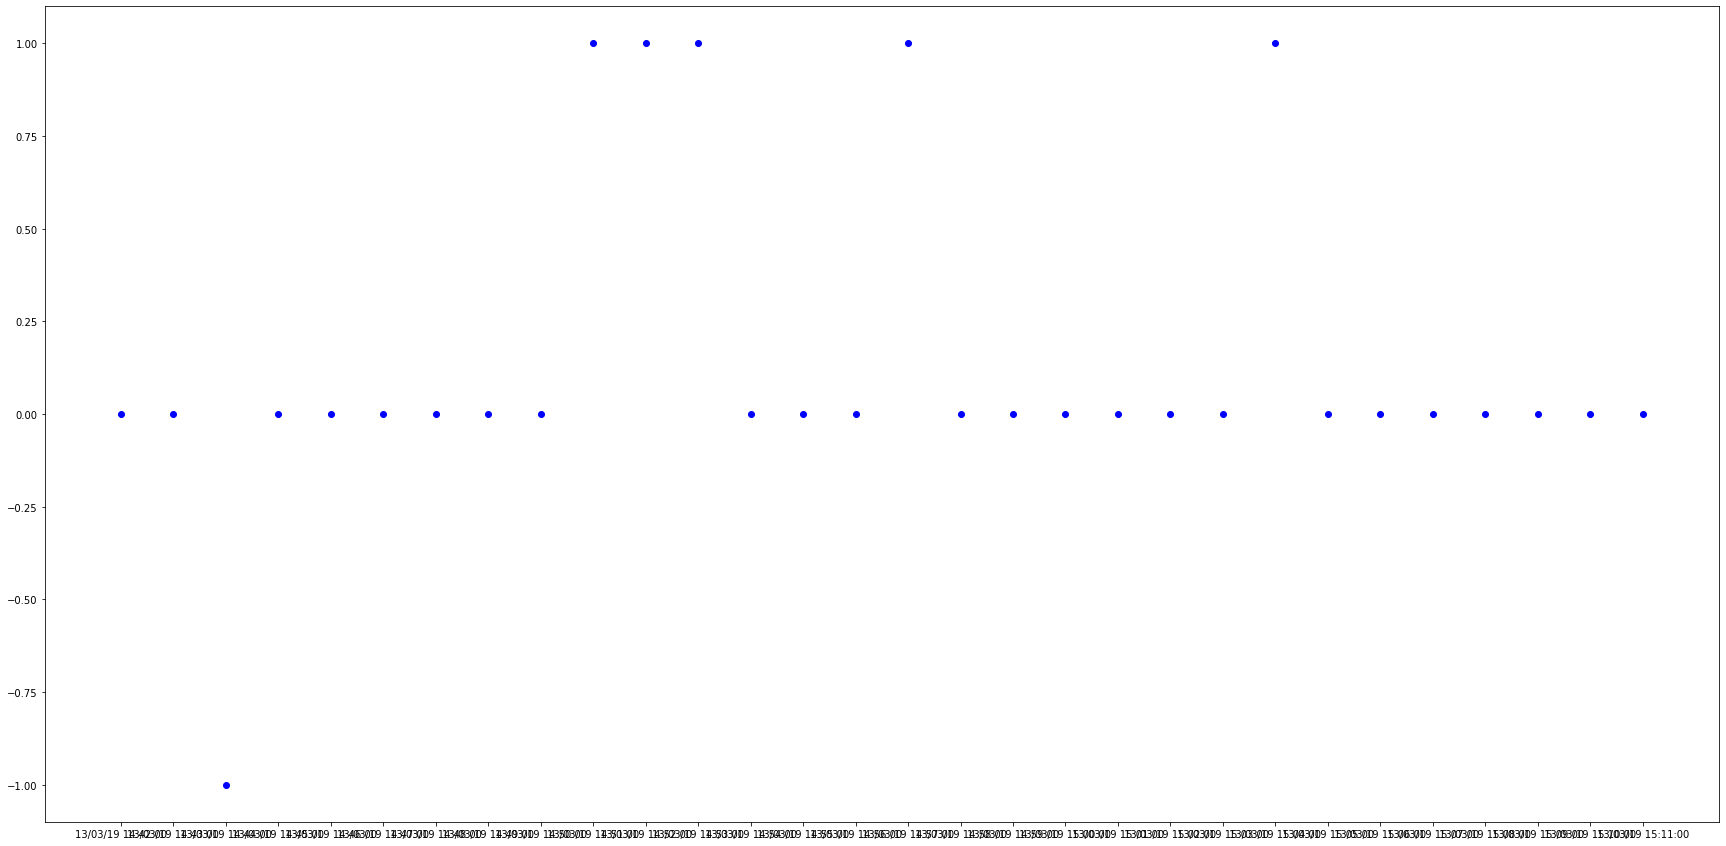

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(data.signal_predict.head(30),'bo')
plt.show()